# jutper基础操作技巧

？询问含义

？？查看源代码

In [1]:
sorted?

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method


tab 导入功能时的补齐提示：
例如，导入matplotlib时，记不清怎么拼写，只需要输入import mat，再按tab键，就会有弹窗弹出来补齐这个键

In [2]:
import matplotlib

%timeit计算代码的运行时间

In [3]:
%timeit L = [n ** 2 for n in range(100)]

17.6 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# numpy入门

numpy 教学网站：https://numpy.org/doc/stable/user/absolute_beginners.html

有效导入、存储和操作内存数据的主题非常广泛，比如文档集合、图像集合、声音片段集合、数值数据集合，等等。这些数据虽然存在明显的异构性，但是将所有数据简单地看作数字数组非常有助于我们理解和处理数据。

例如，可以将图像简单地看作二维数字数组，这些数字数组代表各区域的像素值；声音片段可以看作时间和强度的一维数组；文本也可以通过各种方式转换成数值表示，一种可能的转换是用二进制数表示特定单词或单词对出现的频率。不管数据是何种形式，第一步都是将这些数据转换成数值数组形式的可分析数据。

In [4]:
import numpy as np
np.__version__ #检测模块的版本

'1.21.4'

## 创建数组

### 从Python列表创建数组

In [5]:
np.array([1, 4, 2, 5, 3]) #利用numpy.array创建一个数组

array([1, 4, 2, 5, 3])

In [6]:
np.array([3.14, 4, 2, 3]) #NumPy要求数组必须包含同一类型的数据，如果类型不匹配，NumPy会自动转换

array([3.14, 4.  , 2.  , 3.  ])

In [7]:
np.array([1, 2, 3, 4], dtype='float32') #用dtype关键字明确设置数组的数据类型，这里为浮点数

array([1., 2., 3., 4.], dtype=float32)

In [8]:
np.array([range(i, i + 3) for i in [2, 4, 6]]) #嵌套列表构成的多维数组

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### 用NumPy 内置的方法从头创建数组

np.zeros：创立都是0的数组

np.ones：创立都是1的数组

np.full：创立任意数的数组，需要指定数，如np.full(10, 3)：创立10个3的数组

np.arange:函数返回一个有终点和起点的固定步长的排列

np.linspace函数用于在线性空间中以均匀步长生成数字序列。

np.random.xxxxx创建一系列随机数组

np.eye 创建矩阵

<font color='red'> numpy随机数函数</font>

<font color='red'> np.random.randint()</font>

语法： numpy.random.randint(low, high=None, size=None, dtype=’l’)

功能： 通过low来指定起点，通过high来指定终点，通过size参数来指定数组的维度，通过dtype来确定类型。

说明：返回值为随机整数，范围区间为[low,high），包含low，不包含high

参数：low为最小值，high为最大值，size为数组维度大小，dtype为数据类型，默认的数据类型是np.int

high没有写时，默认生成随机数的范围是[0，low)，但此时必须将size=(x,x)写上去，否则报错；同理，如果不写‘size=’,则要在前面把low和high的值都写上

<font color='red'> np.random.randn()</font>

语法： numpy.random.randn(d0,d1,…,dn)

功能： 用法同np.random.rand()一样，只是服从正态分布。用法同上。

说明：标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）。

randn函数返回一个或一组样本，具有标准正态分布，dn表格每个维度，返回值为指定维度的array

In [9]:
np.zeros(10, dtype=int) #创建一个长度为10的数组，数组的值都是0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
np.ones((3, 5), dtype=float) #创建一个3×5的浮点型数组，数组的值都是1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:
np.full((3, 5), 3.14) #创建一个3×5的浮点型数组，数组的值都是3.14

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [12]:
np.arange(0, 20, 2) #创建一个3×5的浮点型数组，数组的值是一个线性序列，从0开始，到20结束，步长为2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
np.linspace(0, 1, 5) #创建一个5个元素的数组，这5个数均匀地分配到0~1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
np.random.random((3, 3)) #创建一个3×3的、在0~1均匀分布的随机数组成的数组

array([[0.27646442, 0.05676071, 0.86338211],
       [0.64952379, 0.79002768, 0.87623497],
       [0.49280283, 0.12366768, 0.8374937 ]])

In [15]:
np.random.normal(0, 1, (3, 3)) #创建一个3×3的、均值为0、方差为1的正态分布的随机数数组

array([[ 1.07988656, -0.02515695, -0.10167356],
       [ 0.37189939, -0.5335857 , -0.21778589],
       [-0.99845906,  2.48049283,  0.57799232]])

In [16]:
np.random.randint(0, 10, (3, 3)) #创建一个3×3的、[0, 10)区间的随机整型数组

array([[3, 2, 0],
       [1, 5, 9],
       [3, 0, 9]])

In [17]:
np.eye(3) #创建一个3×3的单位矩阵

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
np.empty(2, dtype=int)# 创建一个由3个整型数组成的未初始化的数组,数组的值是内存空间中的任意值

array([         0, 1072693248])

## NumPy数组基础

### NumPy数组的属性

In [19]:
np.random.seed(0) # 设置随机数种子,确保每次程序执行时都可以生成同样的随机数组
x1 = np.random.randint(10, size=6) # 一维数组 #6个数字
x2 = np.random.randint(10, size=(3, 4)) # 二维数组 #3行4列
x3 = np.random.randint(10, size=(3, 4, 5)) # 三维数组 #3组4行5列

In [20]:
print(x1)

[5 0 3 3 7 9]


In [21]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [22]:
print(x3)

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


In [23]:
#每个数组有nidm（数组的维度）、shape（数组每个维度的大小）和 size（数组的总大小）属性

print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [24]:
#属性dtype是数组的数据类型

print("dtype:", x3.dtype)

dtype: int32


In [25]:
#每个数组元素字节大小的 itemsize，以及表示数组总字节大小的属性nbytes
#一般来说，可以认为 nbytes 跟itemsize 和size 的乘积大小相等

print("x3 itemsize:", x3.itemsize, "bytes")
print("x3 size: ", x3.size)
print("x3 nbytes:", x3.nbytes, "bytes")

x3 itemsize: 4 bytes
x3 size:  60
x3 nbytes: 240 bytes


### 数组索引：获取单个元素

In [26]:
x1[0]

5

In [27]:
x1[0] = 12 #可以通过索引赋值的方式修改数组的值
x1

array([12,  0,  3,  3,  7,  9])

In [28]:
x3[-1]

array([[4, 9, 8, 1, 1],
       [7, 9, 9, 3, 6],
       [7, 2, 0, 3, 5],
       [9, 4, 4, 6, 4]])

In [29]:
x3[-1,-1]

array([9, 4, 4, 6, 4])

In [30]:
x3[-1,-1,-1]

4

### 数组切片与复制

我们可以用切片（slice）符号获取子数组，切片符号用冒号（:）表示

In [31]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
x[:5]

array([0, 1, 2, 3, 4])

In [33]:
x[5:]

array([5, 6, 7, 8, 9])

In [34]:
x[4:7] # 中间的子数组

array([4, 5, 6])

In [35]:
x[::2] # 每隔一个元素, 索引0始

array([0, 2, 4, 6, 8])

In [36]:
x[1::2] # 每隔一个元素，从索引1开始

array([1, 3, 5, 7, 9])

In [37]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [38]:
x2[:2, :3]  # 行的维度取前两个，列的维度取前三个，形状变为(2, 3)

array([[3, 5, 2],
       [7, 6, 8]])

In [39]:
x2[:3, ::2]  # 行的维度取前三个（全部），列的维度每个一个取一列，形状变为(3, 2)

array([[3, 2],
       [7, 8],
       [1, 7]])

In [40]:
x2[::-1, ::-1] # 行和列都反序，形状保持(3, 4)

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

In [41]:
print(x2[:, 0])  # x2的第一列

[3 7 1]


In [42]:
print(x2[0, :])  # x2的第一行

[3 5 2 4]


In [43]:
print(x2[0]) #如果是获取行数据的话，可以省略后续的切片，写成更加简洁的方式：

[3 5 2 4]


In [44]:
x2_sub_copy = x2[:2, :2].copy() #copy方法，复制x2数组的前两行前两列，单独拿出来
print(x2_sub_copy)

[[3 5]
 [7 6]]


### 改变数组的形状

另一个数组的常用操作是改变形状。最方便的方式是使用`reshape`方法实现。例如，如果你希望将1~100的数放入一个10x10的数组里面

注意，改变形状要能成功，原始数组和新的形状的数组的总长度`size`必须一样

In [45]:
grid = np.arange(1, 101).reshape((10, 10)) 
print(grid)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


In [46]:
x = np.array([1, 2, 3])
x.reshape((1, 3)) #1行3列

array([[1, 2, 3]])

In [47]:
x.reshape((3, 1)) #3行1列

array([[1],
       [2],
       [3]])

### 数组拼接和分裂

以上所有的操作都是针对单一数组的，但有时也需要将多个数组合并为一个，或将一个数组分裂成多个。

拼接或连接NumPy 中的两个数组主要由np.concatenate、np.vstack 和np.hstack 例程实现。分裂可以通过np.split、np.hsplit 和np.vsplit 函数来实现。

In [48]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

使用np.vstack（垂直栈）和np.hstack（水平栈）函数可以合并多维数组

In [49]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [50]:
y = np.array([[99],
              [99]])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [51]:
a=np.array([4, 8, 8])
b=np.array([6, 9, 2])
print(np.vstack([a, b]))
print(np.hstack([a, b]))

[[4 8 8]
 [6 9 2]]
[4 8 8 6 9 2]


split 分割一维数组

numpy.split 函数沿特定的轴将数组分割为子数组，格式如下： 

numpy.split(ary, indices_or_sections, axis) 

参数说明： 

ary：被分割的数组 

indices_or_sections：如果是一个整数，就用该数平均切分，如果是一个数组，为沿轴切分的位置。

axis：沿着哪个维度进行切向，默认为0，纵向切分(垂直方向)。为1时，横向切分(水平方向)。axis的值看作是x轴的值，为0时即在y轴上那么就是垂直方向，为1是在x轴上那么久是水平方向。axis=0纵向切分，即对着y轴切开；axis=1横向切分，即对着x轴切开。

In [52]:
x=np.arange(1,9)
print(x)
a=np.split(x,4) #传递整数4表示平均切分为4等份
a

[1 2 3 4 5 6 7 8]


[array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8])]

In [53]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5]) #[3,5]表示将原数组按，索引0-2为一组，3-4为一组，5-末尾为一组切分
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [54]:
grid = np.arange(16).reshape((4, 4)) #将一个1到15的整数数列变形为4x4的数列
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [55]:
upper, lower = np.vsplit(grid, [2]) #沿横向分裂
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [56]:
left, right = np.hsplit(grid, [2]) #沿纵向分裂
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## NumPy数组的计算：通用函数

NumPy 中的向量操作是通过通用函数实现的。通用函数的主要目的是对NumPy 数组中的值执行更快的重复操作。

通用函数有两种存在形式：一元通用函数（unary ufunc）对单个输入操作，二元通用函数（binary ufunc）对两个输入操作。

np.add 加法运算（即1 + 1 = 2）

np.subtract 减法运算（即3 - 2 = 1）

np.negative 负数运算（ 即 -2）

np.multiply 乘法运算（ 即 2 * 3 = 6）

np.divide 除法运算（ 即 3 / 2 = 1.5）

np.floor_divide 地板除法运算（floor division，即3 // 2 = 1）

np.power 指数运算（ 即 2 ** 3 = 8）

np.mod 模 / 余数（ 即9 % 4 = 1）

np.absolute (np.abs) 绝对值

In [57]:
import numpy as np
x=np.arange(4)
x

array([0, 1, 2, 3])

In [58]:
print("x + 5 =", x + 5)
print("x * 2 =", x * 2)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x + 5 = [5 6 7 8]
x * 2 = [0 2 4 6]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [59]:
print("x + 5 =",np.add(x, 5))
print("x * 2 =",np.multiply(x, 2))
print("x ** 2 =",np.power(x, 2))
print("x % 2 =",np.mod(x, 2))

x + 5 = [5 6 7 8]
x * 2 = [0 2 4 6]
x ** 2 = [0 1 4 9]
x % 2 = [0 1 0 1]


In [60]:
np.abs(-x) #绝对值

array([0, 1, 2, 3])

In [61]:
#计算三角函数

theta = np.linspace(0, np.pi, 3) #定义一个角度数组
print(theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

[0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [62]:
#指数运算

x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [63]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


除了以上介绍到的，NumPy 还提供了很多通用函数，包括双曲三角函数、比特位运算、比较运算符、弧度转化为角度的运算、取整和求余运算，等等。浏览NumPy 的文档将会揭示很多有趣的功能。

还有一个更加专用，也更加晦涩的通用函数优异来源是子模块scipy.special。如果你希望对你的数据进行一些更晦涩的数学计算，scipy.special 可能包含了你需要的计算函数。这些函数能列一个长长的列表

In [64]:
#聚合 

x = np.arange(1, 6)
print(np.add.reduce(x)) #对add通用函数调用reduce方法会返回数组中所有元素的和
print(np.multiply.reduce(x)) #对multiply通用函数调用reduce方法会返回数组中所有元素的乘积

#如果需要存储每次计算的中间结果，可以使用accumulate：
print(np.add.accumulate(x)) 
print(np.multiply.accumulate(x))

15
120
[ 1  3  6 10 15]
[  1   2   6  24 120]


In [65]:
#外积
#两行代码生成九九乘法表的结果

x = np.arange(1, 10)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

## 聚合：最小值、最大值和其他值

np.sum  计算元素的和

np.min  找出最小值

np.max  找出最大值

np.argmin  找出最小值的索引

np.argmax  找出最大值的索引

np.prod 计算元素的积

np.mean 计算元素的平均值

np.median 计算元素的中位数

np.std 计算元素的标准差

np.var 计算元素的方差

In [66]:
import numpy as np
L = np.random.random(100)
print(sum(L)) #python内置的求和
print(np.sum(L)) #np数组的求和

52.12818058833704
52.12818058833702


In [67]:
M = np.random.random((2, 3))
print(M)

[[0.16684751 0.77905102 0.8649333 ]
 [0.41139672 0.13997259 0.03322239]]


In [68]:
print(M.max()) #默认情况下，NumPy聚合函数会返回对整个数组的聚合结果
print(M.min(axis=0)) #聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合。例如，可以通过指定axis=0 找到每一列的最小值
print(M.max(axis=1)) #通过指定axis=1找到每一行的最大值

#axis=0 意味着第一个轴将要被折叠————对于二维数组，这意味着每一列的值都将被聚合
#axis=1 意味着第二个轴将要被折叠———对于二维数组，这意味着每一行的值都将被聚合

0.8649332956024927
[0.16684751 0.13997259 0.03322239]
[0.8649333  0.41139672]


NumPy 提供了很多其他聚合函数，但是这里不会详细地介绍它们。另外，大多数的聚合都有对NaN 值的安全处理策略（NaN-safe），即计算时忽略所有的缺失值。例如，np.sum的安全函数为np.nansum, 规律都是在函数前加上‘nan’。

python读取文件报错(unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape，解决方法参考：https://www.cnblogs.com/rychh/p/9743864.html

1、在路径前加上r；2、将一个反斜杠(\)写成两个(\\)，改为绝对路径

In [69]:
import pandas as pd
import numpy as np

filepath='C:\\Users\\12297\\python学习\\python数据分析\\python数据科学\\data\\president_heights.csv'
df = pd.read_csv(filepath)
df.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


另一种写法：filepath=r'C:\Users\12297\python学习\python数据分析\python数据科学\data\president_heights.csv'

In [70]:
heights = np.array(df['height(cm)'])
print(heights,'\n')

print("平均身高: ", heights.mean())
print("身高标准差:", heights.std())
print("身高最小值: ", heights.min())
print("身高最大值: ", heights.max())
print("身高25分位数: ", np.percentile(heights, 25))
print("身高中位数: ", np.median(heights))
print("身高75分位数:  ", np.percentile(heights, 75))

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185] 

平均身高:  179.73809523809524
身高标准差: 6.931843442745892
身高最小值:  163
身高最大值:  193
身高25分位数:  174.25
身高中位数:  182.0
身高75分位数:   183.0


Text(0, 0.5, 'number')

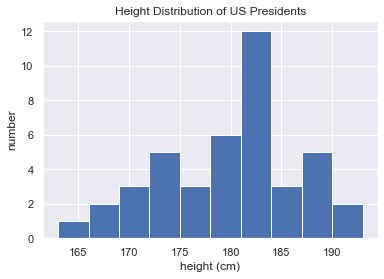

In [71]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

## 数组的计算：广播

In [72]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [73]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

数组的广播模式，大概可以从下面的图片中去理解，可以理解为是自动按最多维补齐后相加。

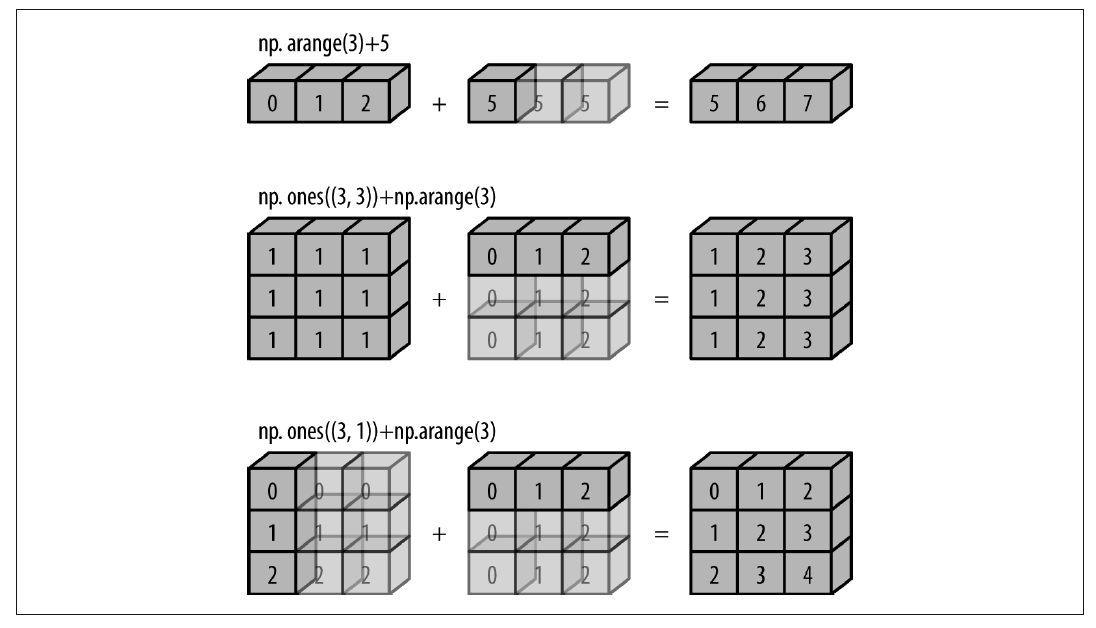

NumPy 的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作。

• 规则1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补1。

• 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1 的维度扩展以匹配另外一个数组的形状。

• 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常。

In [74]:
M = np.ones((2, 3),dtype='int32' )
a = np.arange(3)
print(M, '\n')
print(a, '\n')
print(M+a)

[[1 1 1]
 [1 1 1]] 

[0 1 2] 

[[1 2 3]
 [1 2 3]]


In [75]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a, '\n')
print(b, '\n')
print(a+b)

[[0]
 [1]
 [2]] 

[0 1 2] 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [76]:
c = np.ones((3, 2),dtype='int32' )
d = np.arange(3)
print(c, '\n')
print(d, '\n')
d[:, np.newaxis,] #np.newaxis的作用就是在这一位置增加一个一维，这一位置指的是np.newaxis所在的位置

[[1 1]
 [1 1]
 [1 1]] 

[0 1 2] 



array([[0],
       [1],
       [2]])

In [77]:
print(c + d[:, np.newaxis]) #np.newaxis的作用就是在这一位置增加一个一维，这一位置指的是np.newaxis所在的位置

[[1 1]
 [2 2]
 [3 3]]


### $\color{#FF3030}{数组的归一化？不理解}$

In [78]:
X = np.random.random((10, 3))
print(X)
Xmean = X.mean(0)
Xmean

[[0.98257496 0.37329075 0.42007537]
 [0.05058812 0.36549611 0.01662797]
 [0.23074234 0.7649117  0.94412352]
 [0.74999925 0.33940382 0.48954894]
 [0.33898512 0.17949026 0.1709866 ]
 [0.46345098 0.87457296 0.94411975]
 [0.60825287 0.59665541 0.78364425]
 [0.5000263  0.05037006 0.69909807]
 [0.9923964  0.26726254 0.67909062]
 [0.86428144 0.75084425 0.96448977]]


array([0.57812978, 0.45622978, 0.61118049])

In [79]:
X_centered = X - Xmean
X_centered.mean(0)

array([-8.88178420e-17, -2.22044605e-17, -1.11022302e-17])

### $\color{#FF3030}{画一个二维函数？不理解}$

In [80]:
# x和y表示0~5区间50个步长的序列
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

C:\Users\12297\AppData\Local\Temp/ipykernel_8204/3242533819.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


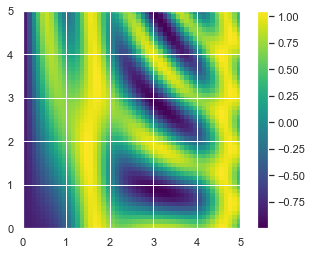

In [81]:
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],cmap='viridis')
plt.colorbar()

## 比较、掩码和布尔逻辑

### 示例：统计下雨天数

当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。例如你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常点。在NumPy 中，布尔掩码通常是完成这类任务的最高效方式

In [82]:
import numpy as np
import pandas as pd

filepath='C:\\Users\\12297\\python学习\\python数据分析\\python数据科学\\data\\Seattle2014.csv'
rainfall = pd.read_csv(filepath)
rainfall.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [83]:
import matplotlib.pyplot as plt

rainfall = pd.read_csv(filepath)['PRCP'].values #利用Pandas抽取降雨量，放入一个NumPy数组
inches = rainfall / 254
inches.shape

(365,)

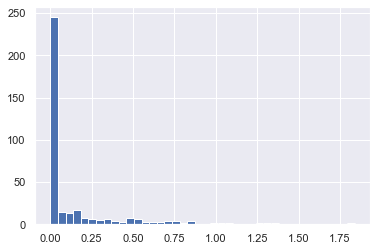

In [84]:
plt.hist(inches, 40);

### 和通用函数类似的比较操作

In [85]:
x = np.array([1, 2, 3, 4, 5])

In [86]:
x <= 3

array([ True,  True,  True, False, False])

In [87]:
x != 3

array([ True,  True, False,  True,  True])

In [88]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [89]:
rng = np.random.RandomState(0) #通过numpy工具包生成模拟数据集，使用RandomState获得随机数生成器

x = rng.randint(10, size=(3, 4))
print(x)
print(x < 4)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[False  True  True  True]
 [False False  True False]
 [ True False False False]]


In [90]:
np.count_nonzero(x < 4) #有多少值小于 4？

5

In [91]:
np.sum(x < 4, axis=0) # 每列有多少值小于 4？

array([1, 1, 2, 1])

In [92]:
np.sum(x < 4, axis=1) # 每行有多少值小于 4？

array([3, 1, 1])

要快速检查任意或者所有这些值是否为True，可以用np.any() 或np.all()

In [93]:
np.any(x > 8) #有没有值大于8？

True

In [94]:
np.all(x == 6) #是否所有值都等于6？

False

Python 有内置的sum()、any() 和all() 函数，这些函数在NumPy 中有不同的语法版本。如果在多维数组上混用这两个版本，会导致失败或产生不可预知的错误结果。因此，确保在以上的示例中用的都是np.sum()、np.any()和np.all() 函数

In [95]:
np.sum((inches > 0.5) & (inches < 1)) #降水量大于0.5并且小于1英寸的天数有多少

29

利用A AND B 和NOT (A OR B) 的等价原理

In [96]:
np.sum(~( (inches <= 0.5) | (inches >= 1) )) # 总共有多少：[非（降水量小于等于0.5英寸或大于1英寸）]

29

逐位的布尔运算符和其对应的通用函数

& : np.bitwise_and

| : np.bitwise_or

^ : np.bitwise_xor

~ : np.bitwise_not

In [97]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) &(inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


In [98]:
print(x)
x[x < 5] #将这些值从数组中选出，可以进行简单的索引，即掩码操作

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


array([0, 3, 3, 3, 2, 4])

In [99]:
#通过将布尔操作、掩码操作和聚合结合，可以快速回答对数据集提出的这类问题

# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码（6月21日是第172天）
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches): ",np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


and 和or 对整个对象执行单个布尔运算，而& 和| 对一个对象的内容（单个比特或字节）执行多个布尔运算。对于NumPy 布尔数组，后者是常用的操作。

对给定数组进行逻辑运算时，你也应该使用| 或&，而不是or 或and。

## 花哨的索引

在前面的小节中，我们看到了如何利用简单的索引值（如arr[0]）、切片（如arr[:5]）和布尔掩码（如arr[arr > 0]）获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

In [100]:
# 注意，以2维数组X1为例，X1[0]意为选择第1行,X1[0, :]意为也选择第1行,X1[:2,1:]意为选择第1到2行和2到最后一列的数据
#注意 X1[:2,1:]，其中：2表示[0,2]应该是第1到2行，而不是1到3行，因为左开右闭，2是开区间所以取不到第3行

rng = np.random.RandomState(0) #通过numpy工具包生成模拟数据集，使用RandomState获得随机数生成器
X1= rng.randint(99, size=(5, 5))
print(X1, '\n')
print(X1[0], '\n')
print(X1[0, :], '\n')
print(X1[:2,1:])

[[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]
 [65 39 87 46 88]
 [81 37 25 77 72]] 

[44 47 64 67 67] 

[44 47 64 67 67] 

[[47 64 67 67]
 [83 21 36 87]]


In [101]:
import numpy as np
rng = np.random.RandomState(0) #通过numpy工具包生成模拟数据集，使用RandomState获得随机数生成器
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [102]:
# 将花哨的索引和简单的索引组合使用：

x[2, [2, 0, 1]] # 索引数组x的第3行，第3、1、2列

array([7, 2, 4])

In [103]:
# 将花哨的索引和切片组合使用：

x[1:, [2, 0, 1]] #索引数组第2到最后一行、第3、1、2列，注意2, 0, 1的顺序关乎索引的顺序

array([[3, 7, 9],
       [7, 2, 4]])

In [104]:
# 将花哨的索引和掩码组合使用：
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]

NameError: name 'row' is not defined

花哨的索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个N×D 的矩阵，表示在D 个维度的N 个点。以下是一个二维正态分布的点组成的数组

In [105]:
# 以下是一个二维正态分布的点组成的数组

rng = np.random.RandomState(0) #通过numpy工具包生成模拟数据集，使用RandomState获得随机数生成器

mean = [0, 0] #mean：均值，n维分布的平均值
cov = [[1, 2],[2, 5]] # cov：分布的协方差矩阵
X = rng.multivariate_normal(mean, cov, 100) #从多元正态分布中随机抽取样本
X.shape #获取数组的形状

(100, 2)

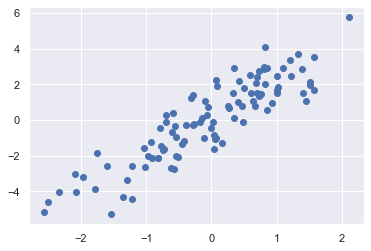

In [106]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]); # X[:, 0]索引第一列，X[:, 1]索引第二列

In [107]:
# 选择20个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值：
#numpy.random.choice(a, size=None, replace=True, p=None)
#从a(只要是ndarray都可以，但必须是一维的)中随机抽取数字，并组成指定大小(size)的数组
#replace:True表示可以取相同数字，False表示不可以取相同数字
#数组p：与数组a相对应，表示取数组a中每个元素的概率，默认为选取每个元素的概率相同

indices = np.random.choice(X.shape[0], 20, replace=False) #从0——99抽取20个数
indices

array([ 6, 94, 67, 95, 90, 61,  1, 60, 37, 53, 26, 47, 88, 62, 31, 96,  9,
        3, 65, 80])

In [108]:
selection = X[indices] #在数组X中随机抽取的20个数字，抽取的序号位置是上面随机生成的 indices数组
selection.shape

(20, 2)

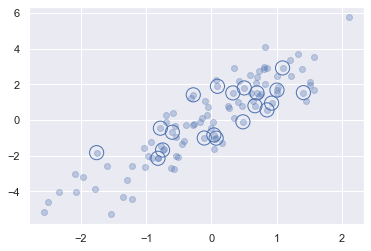

In [109]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) #X[:, 0]意为索引二维数组X的第一列，X[:, 1]意为索引二维数组X的第二列
plt.scatter(selection[:, 0], selection[:, 1], 
            facecolor='none', edgecolor='b', s=200);#facecolor表面颜色、edgecolor：边缘颜色

print(x2[0])  如果是获取行数据的话，可以省略后续的切片，写成左边更加简洁的方式

In [110]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [111]:
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [112]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [113]:
# at() 函数在这里对给定的操作、给定的索引（这里是i）以及给定的值（这里是1）执行的是就地操作
# 另一个可以实现该功能的类似方法是通用函数中的reduceat() 函数

x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
np.add.at(x, i, 1) # 借助通用函数中的add.at() 方法实现累加
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


np.random.randn()

语法： numpy.random.randn(d0,d1,…,dn)

功能： 用法同np.random.rand()一样，只是服从正态分布。用法同上。

说明：标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）。

randn函数返回一个或一组样本，具有标准正态分布，dn表格每个维度，返回值为指定维度的array

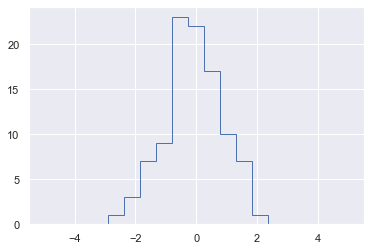

In [114]:
np.random.seed(42)
x = np.random.randn(100) #rand函数根据给定维度生成[0,1)之间的数据，包含0，不包含1
bins = np.linspace(-5, 5, 20) # #创建一个20个元素的数组，这20个数均匀地分配到-5~5
plt.hist(x, bins, histtype='step');

## 数组的排序

In [115]:
#普通的通过一次次循环对数组排序的方法
#注意，当x为[2, 1, 4, 3, 5]，np.argmin(x[2:])意为找出[4,3,5]中最小的数的索引数(排序)
#这里3最最小，索引数应该是1，而不是看3在整个数组中的位置，索引值不是想当然的3

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:]) # armin用来查找最小值的下标
        (x[i], x[swap]) = (x[swap], x[i]) #通过索引的方式修改了数组的值
    return x

In [116]:
x = np.array([2, 1, 4, 3, 5]) #注意，当x为[2, 1, 4, 3, 5]，np.argmin(x[2:])意为找出[4,3,5]中最小的数的索引数(排序)
np.argmin(x[2:])#这里3最最小，索引数应该是1，而不是看3在整个数组中的位置，索引值不是想当然的3

1

In [117]:
selection_sort(x) #调用函数进行排序

array([1, 2, 3, 4, 5])

这种排序方法因为其简洁而非常有用，但是它对于大数组来说太慢了。对于一个包含N个值的数组来说，它需要做N个循环，速度太慢

In [118]:
# 更方便更傻但是效率最低的 bogosort排序算法
# 这个很傻的算法的实现完全是碰运气：它不断对数组元素进行随机重排，直到成为有序数组才停止
# 这个算法的复杂度为[N × N !]（N 乘以N 的阶乘）

def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x) #random.shuffle()函数将序列中的元素随机打乱
    return x

In [119]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

尽管Python 有内置的sort 和sorted 函数可以对列表进行排序，但是这里不会介绍这两个函数，因为NumPy 的np.sort 函数实际上效率更高。默认情况下，np.sort 的排序算法是快速排序，另外也可以选择归并排序和堆排序。对于大多数应用场景，默认的快速排序已经足够高效了

In [120]:
#如果想在不修改原始输入数组的基础上返回一个排好序的数组,可以使用np.sort：
#sorted()类似，也是产生一个新的列表

x = np.array([2, 1, 4, 3, 5])
np.sort(x) #np.sort等价于sorted(x) 

array([1, 2, 3, 4, 5])

In [121]:
print(x) #原数组未改变

[2 1 4 3 5]


In [122]:
#如果希望用排好序的数组替代原始数组，可以使用数组的sort 方法：

x = np.array([2, 1, 4, 3, 5])
x.sort()
print(x)

[1 2 3 4 5]


In [123]:
#argsort函数返回的原始数组排好序的索引值：

x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

x[i] #这些索引值可以被用于（通过花哨的索引）创建有序的数组

[1 0 3 2 4]


array([1, 2, 3, 4, 5])

### 沿着行或列排序

np.random.randint()

语法： numpy.random.randint(low, high=None, size=None, dtype=’l’)

功能： 通过low来指定起点，通过high来指定终点，通过size参数来指定数组的维度，通过dtype来确定类型。

说明：返回值为随机整数，范围区间为[low,high），包含low，不包含high

参数：low为最小值，high为最大值，size为数组维度大小，dtype为数据类型，默认的数据类型是np.int

high没有写时，默认生成随机数的范围是[0，low)，但此时必须将size=(x,x)写上去，否则报错；同理，如果不写‘size=’,则要在前面把low和high的值都写上

In [124]:
#创建一个

rng = np.random.RandomState(42)
X2 = rng.randint(0,10, (4,6)) #
print(X2)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [125]:
#对X的每一列排序
#需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将会丢失

np.sort(X2, axis=0) 

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [126]:
#对X的每一行排序
#需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将会丢失

np.sort(X2, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K 小的值，NumPy 的np.partition 函数提供了该功能。np.partition 函数的输入是数组和数字K，输出结果是一个新数组，最左边是第K 小的值，往右是任意顺序的其他值：

In [127]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3) #partition函数，在这里把前三小的数放在最左边重新排列，在这两个分隔区间中，元素都是任意排列的

array([2, 1, 3, 4, 6, 5, 7])

In [128]:
np.partition(X2, 2, axis=1) #找到每一行前两小的值放在最左边重新排列，在这两个分隔区间中，元素都是任意排列的

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

### 示例：K个最近邻

In [129]:
import numpy as np

rng = np.random.RandomState() #设置随机种子
X = rng.rand(10,2) #返回服从[0,1)均匀分布的随机样本值 # 10行2列,意思是10个(x,y)点

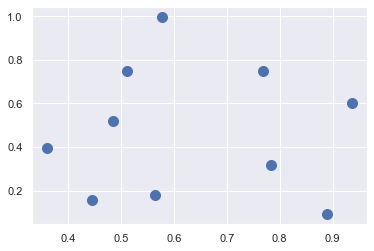

In [130]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #设置画图风格,在这里可以显示网格线

plt.scatter(X[:, 0], X[:, 1], s=100); #第一列数据是X轴，第二列数据是Y轴

对于《Python数据科学手册》p78页示例：K个最近邻的dist_sq理解 https://blog.csdn.net/weixin_44765605/article/details/106178424

In [131]:
 #用一行代码计算矩阵的平方距离 

dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1) 

#axis=-1意思就是在最后一个轴展开求平方和运算，就是把（X-Y）的平方加在一起
# 我们学过两点间距离的平方等于每个维度的距离差的平方的和（勾股定理）
# X实际上是一个10行2列的二维数组，如果不扩列，X[:,:]- X[:,:]得到的结果全都是0，因为每个X，Y都在和自身相减。
# 我们需要的是让每一个X坐标和Y坐标都能和其他坐标相减，所以要升维操作并利用数组的广播规则。
# 具体来说，如X[:,np.newaxis,:] - X[np.newaxis,:,:]，广播之后就计算每一个坐标之间的差值
# 广播之后的形状为：（10,10,2），每一个X坐标、Y坐标都被重复10次，每一个点都要被其他点减去10次，这样才可以计算每个点和其他点的距离

In [132]:
dist_sq.diagonal() #该矩阵的对角线（也就是每个点到其自身的距离）的值都是0，表明计算方法正确

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [133]:
nearest = np.argsort(dist_sq, axis=1) #使用np.argsort函数沿着每行进行排序，返回的原始数组排好序的索引值：
print(nearest)

[[0 9 2 6 4 3 7 5 1 8]
 [1 3 5 8 9 4 7 0 2 6]
 [2 4 6 0 7 9 3 5 8 1]
 [3 1 5 9 4 8 7 0 2 6]
 [4 7 2 5 3 0 8 9 6 1]
 [5 8 3 7 1 4 9 2 0 6]
 [6 2 0 4 9 7 3 5 8 1]
 [7 4 8 5 2 3 0 9 1 6]
 [8 5 7 4 3 1 2 9 0 6]
 [9 0 3 2 4 1 6 5 7 8]]


numpy.argpatition() 应用详解  https://blog.csdn.net/SanyHo/article/details/105455175

In [134]:
# np.argpartition()将传入的数组分成两部分，即从第K个小的数将数组分成两部分
# 前半部分为前K小的索引，后半部分为其他，###注意：两部分内部(可能前半部分排序？)都不排序
# 取出K个最邻近，分隔每一行

K = 2
nearest_partition = np.argpartition(dist_sq, K, axis=1) #将前3小（位置2）的平方和的值挑选出来

#为何？要这样挑选？

In [135]:
# np.argpartition()的例子

N=np.array([10,90,30,50,40,80,20,70,60])
K = 3
np.argpartition(N, K) #选出前4小的数字的索引，按照索引将数组分成两部分

#下方可见，10,20,30,40最小，分别对应索引0,6,2,4

array([6, 0, 2, 4, 1, 5, 3, 7, 8], dtype=int64)

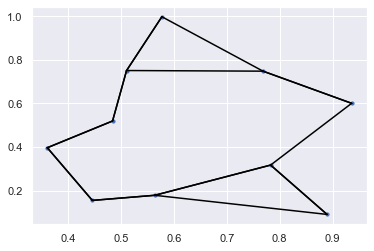

In [136]:
import seaborn; seaborn.set() #设置画图风格,在这里可以显示网格线

plt.scatter(X[:, 0], X[:, 1], s=10)

K = 2

#为每一个坐标找到距离这个点最近的K个点，并连线
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]: 
        # K+1是开区间，索引不到K+1刚好索引到K  
        # 找到前3个数连线，是因为还有原点包括在其中
        plt.plot(*zip(X[j], X[i]), color='black')

## 结构化数据：NumPy的结构化数组

假定现在有关于一些人的分类数据（如姓名、年龄和体重），我们将它们存在三个单独的数组中

In [137]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

如果可以用一种单一结构来存储所有的数据，那么看起来会更自然。NumPy 可以用结构化数组实现这种存储，这些结构化数组是复合数据类型的。

通过指定复合数据类型，可以构造一个结构化数组：

<strong>data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),'formats':('U10', 'i4', 'f8')})<strong>

In [138]:
# 使用复合数据结构的结构化数组
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),'formats':('U10', 'i4', 'f8')})

# U10 表示“长度不超过10的Unicode 字符串”
# i4 表示“4 字节（即32比特）整型”，
# f8 表示“8 字节（即64比特）浮点型”

#数据列表如下
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

#将列表数据放入数组中
data['name'] = name 
data['age'] = age
data['weight'] = weight

#输出结构化数组
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [139]:
data['name'] #获取所有名字

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [140]:
data[0] #获取数据第一行

('Alice', 25, 55.)

In [141]:
data[-1]['name'] #获取最后一行的名字 #双重索引

'Doug'

In [142]:
data[data['age'] < 30]['name'] #获取年龄小于30岁的人的名字

array(['Alice', 'Doug'], dtype='<U10')

<strong>双重+条件索引的写法，很值得学习</strong>

<strong>[data['age'] < 30]['name']  #获取年龄小于30岁的人的名字

结构化数组的数据类型有多种制定方式。此前我们看过了采用字典的方法

In [143]:
#np.dtype意为获取or定义数据类型

np.dtype({'names':('name', 'age', 'weight'),'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [144]:
#数值数据类型可以用Python类型或NumPy的dtype类型指定
np.dtype({'names':('name', 'age', 'weight'),'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

复合类型也可以是元组组成的列表

In [145]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [146]:
np.dtype('S10,i4,f8') #如果类型的名称对你来说并不重要，那你可以仅仅用一个字符串来指定它

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

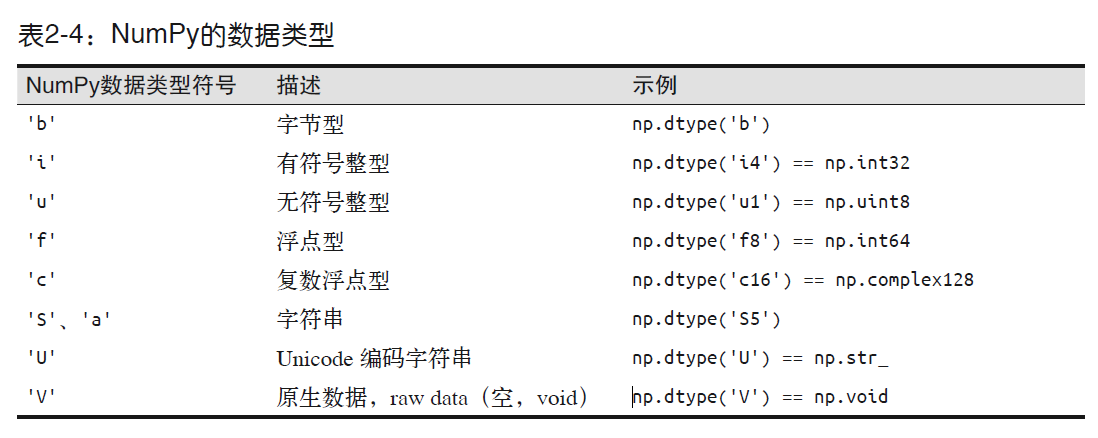

In [147]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp) #创立一个结构化数组
X

array([(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])],
      dtype=[('id', '<i8'), ('mat', '<f8', (3, 3))])

In [148]:
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


现在X 数组的每个元素都包含一个id 和一个3×3 的矩阵。为什么我们宁愿用这种方法存储数据，也不用简单的多维数组，或者Python 字典呢？原因是NumPy 的dtype 直接映射到C 结构的定义，因此包含数组内容的缓存可以直接在C 程序中使用。如果你想写一个Python 接口与一个遗留的C 语言或Fortran 库交互，从而操作结构化数据，你将会发现结构化数组非常有用！

**几种索引方式的比较**

In [149]:
data['age']

array([25, 45, 37, 19])

In [150]:
#NumPy 还提供了np.recarray 类，它有一个独特的特征：域可以像属性一样获取，而不是像字典的键那样获取。

data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [151]:
data_rec['age']

array([25, 45, 37, 19])

In [152]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

80.2 ns ± 0.427 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
1.28 µs ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.14 µs ± 30 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
